In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
Datos = pd.read_csv(r'D:\UNIVERSIDAD\2024\Analisis de datos\Tarea 4\Mall_Customers.csv')

In [5]:
Datos.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Datos faltante y atipicos')

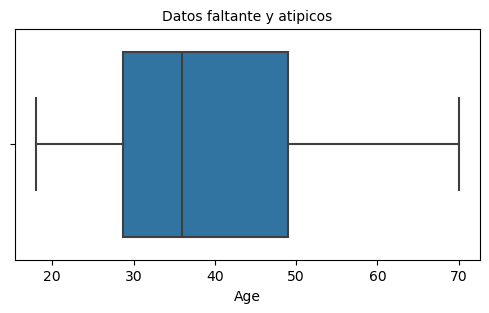

In [7]:
plt.figure(figsize= (6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Datos faltante y atipicos',fontsize= 10)

Text(0.5, 1.0, 'Datos faltante y atipicos')

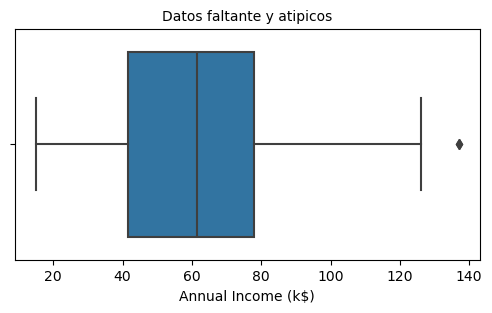

In [8]:
plt.figure(figsize= (6,3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Datos faltante y atipicos',fontsize= 10)

Text(0.5, 1.0, 'Datos faltante y atipicos')

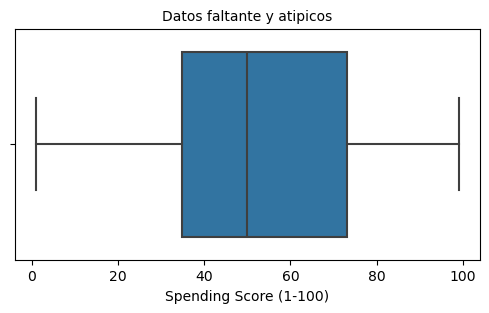

In [9]:
plt.figure(figsize= (6,3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Datos faltante y atipicos',fontsize= 10)

In [10]:
# Preprocesar datos  ( valores faltantes y transformarlos si es necesario)


In [11]:
Datos['Age']= Datos['Age'].replace(0,Datos['Age'].mean())
Datos['Spending Score (1-100)']= Datos['Spending Score (1-100)'].replace(0,Datos['Spending Score (1-100)'].mean())
Datos['Annual Income (k$)']= Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())

In [12]:
#Conteo de datos atipicos

In [13]:
Min=0
Max=100
Atipicos = ((Datos ['Spending Score (1-100)']< Min)|(Datos['Spending Score (1-100)']> Max)).sum()
print( "El total de datos atipicos de Spendig score (1-100) es {}".format(Atipicos))
Min=18
Max=70
Atipicos = ((Datos ['Age']< Min)|(Datos['Age']> Max)).sum()
print( "El total de datos atipicos de Age  (18-70) es {}".format(Atipicos))
Min=15
Max=140
Atipicos = ((Datos ['Annual Income (k$)']< Min)|(Datos['Annual Income (k$)']> Max)).sum()
print( "El total de datos atipicos de Annual Income (k$)  (40-140) es {}".format(Atipicos))

El total de datos atipicos de Spendig score (1-100) es 0
El total de datos atipicos de Age  (18-70) es 0
El total de datos atipicos de Annual Income (k$)  (40-140) es 0


In [14]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
#seleccionar caracteristicas relevantantes para entrenar el modelo utilizando seleccion de características
#Tomaremos Annual Incom(k$) (Entradas anuales en miles )  y Spending score  ( Puntaje de gastos )

In [16]:
Datos = Datos [["Age","Annual Income (k$)", "Spending Score (1-100)"]]

In [17]:
Datos.head (10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


Text(0.5, 1.0, 'unbundled clients')

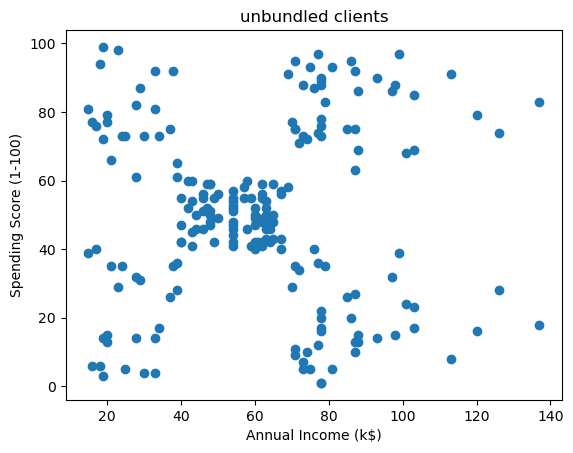

In [18]:
# grafica antes del agrupamiento
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'] )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('unbundled clients')

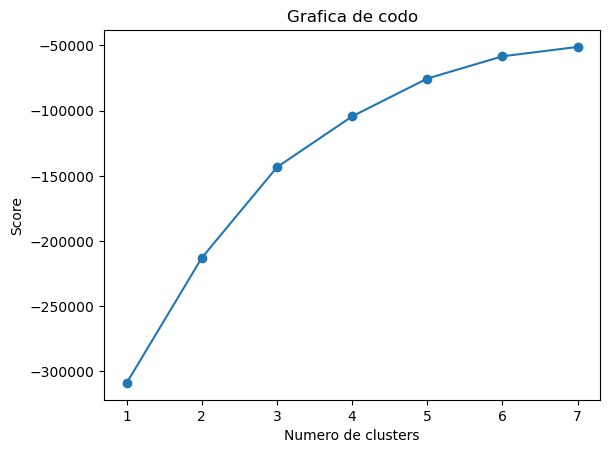

In [19]:
#Entrenar el modelo configurando los diferentes hiperparametros 
Nc = range(1,8) 
kmeans= [KMeans(n_clusters = i)for i in Nc] 
kmeans 
score = [kmeans[i].fit(Datos).score(Datos)for i in range (len(kmeans))] 
score 
plt.plot(Nc, score, marker = 'o')
plt.xlabel('Numero de clusters') 
plt.ylabel('Score') 
plt.title('Grafica de codo') 
plt.show()

In [84]:
#segun mi grafica de codo podria inferir que el numero de clusters son 5

In [25]:
Modelo = KMeans (n_clusters = 5 , random_state = 0)
Modelo.fit(Datos)

KMeans(n_clusters=5, random_state=0)

In [26]:
Modelo.labels_
Datos["Cluster"] = Modelo.labels_
print(Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        0
1     21                  15                      81        4
2     20                  16                       6        0
3     23                  16                      77        4
4     31                  17                      40        0
..   ...                 ...                     ...      ...
195   35                 120                      79        1
196   45                 126                      28        3
197   32                 126                      74        1
198   32                 137                      18        3
199   30                 137                      83        1

[200 rows x 4 columns]


In [87]:
# Evaluar el desempeño del modelo con metricas como coheficiente de silhuette, indice de calinsky-harabasz

In [29]:
#Preparacion de la metrica de la columna Cluster

In [28]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
#Preparacion de la metrica de la columna Cluster
Observaciones = len(Datos)
x = Datos.drop('Cluster', axis=1)
clusters = Datos['Cluster']

# Calculo de metricas
sil_score = silhouette_score(x, clusters)
calinski_score = calinski_harabasz_score(x, clusters)
davies_score = davies_bouldin_score(x, clusters)

# se crea una tabla para mostrar los valores de las metricas
table_data  = [
    ["Numero de observaciones", Observaciones],
    ["Coeficiente silhouette", sil_score],
    ["Indice calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]   
]

from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))


+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de observaciones  |         200         |
|  Coeficiente silhouette  | 0.44428597560893024 |
| Indice calinski Harabasz | 151.04386000160667  |
|  Indice Davies Bouldin   | 0.8218781633199781  |
+--------------------------+---------------------+


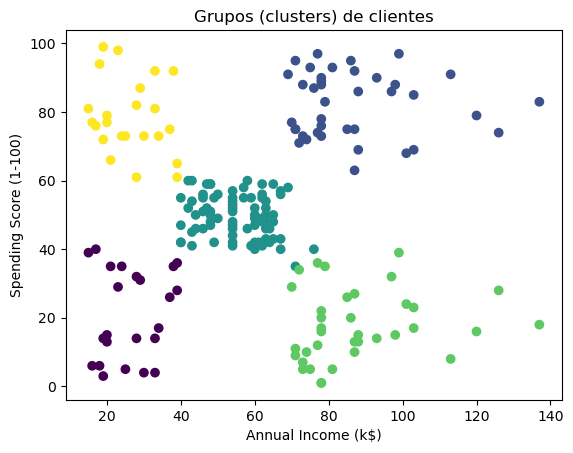

In [31]:
#Graficas del modelo

plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Cluster'], cmap= 'viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos (clusters) de clientes')
plt.show()

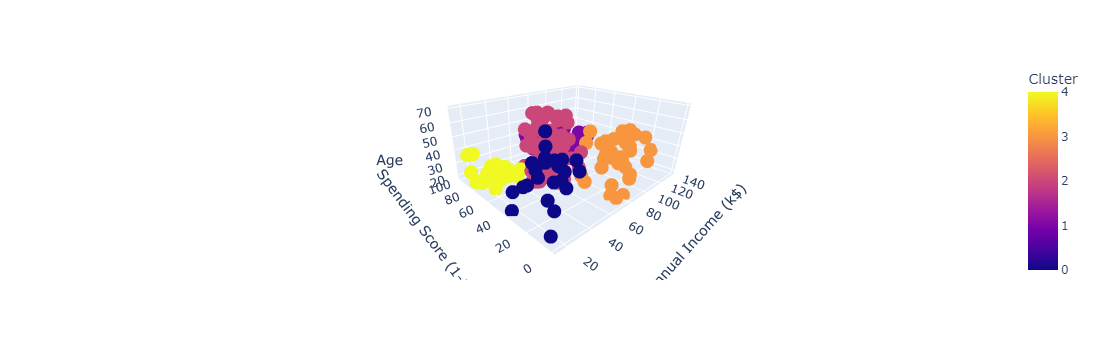

In [36]:
import plotly.express as px
Graph3D = px.scatter_3d(Datos, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Cluster')
Graph3D.show()